# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

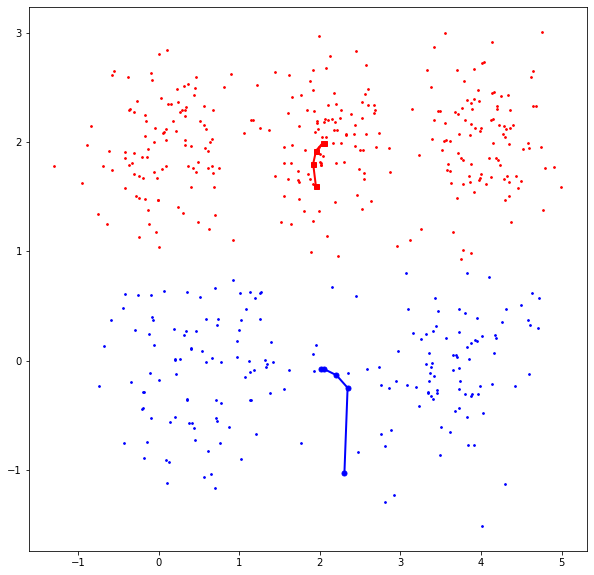

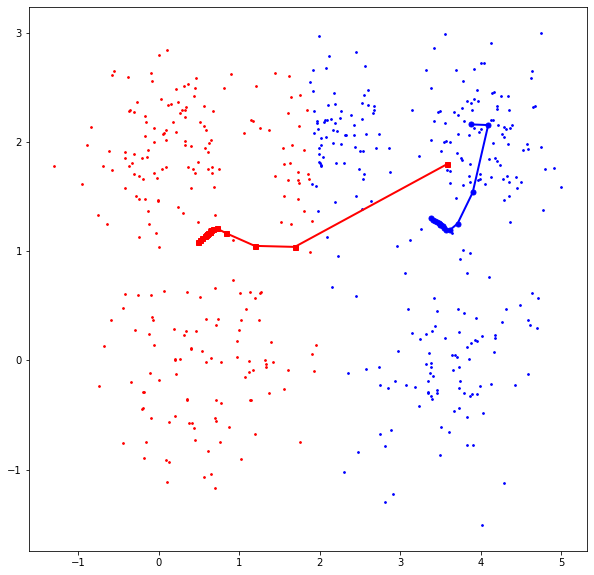

In [5]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
x = sio.loadmat('kmeans_data.mat')['X']
k = 2  # modify if you want
max_SD, min_SD = 0, 1e8
max_t, min_t = None, None
for i in range(1000):
    idx, ctrs, iter_ctrs = kmeans(x, k)
    d = np.sum(np.linalg.norm(x[idx==0] - ctrs[0], axis=1)) + \
               np.sum(np.linalg.norm(x[idx==1] - ctrs[1], axis=1))
    if d > max_SD:
        max_SD = d
        max_t = (x, idx, ctrs, iter_ctrs)
    if d < min_SD:
        min_SD = d
        min_t = (x, idx, ctrs, iter_ctrs)
kmeans_plot(max_t[0],max_t[1],max_t[2],max_t[3])
kmeans_plot(min_t[0],min_t[1],min_t[2],min_t[3])

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

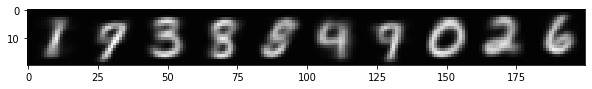

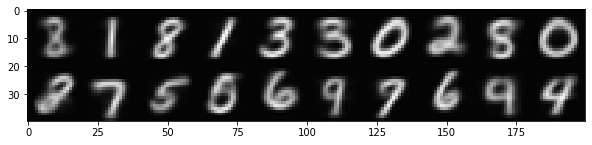

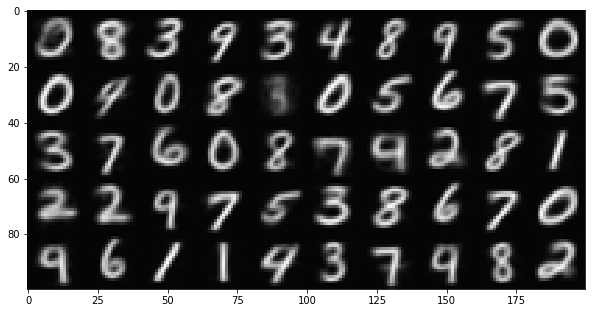

In [3]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

1
2
3
4
5
6
7
8
9


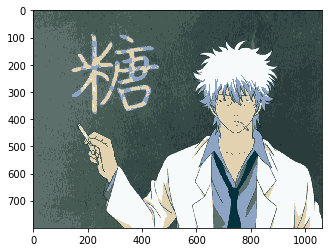

1
2
3
4
5
6
7
8
9


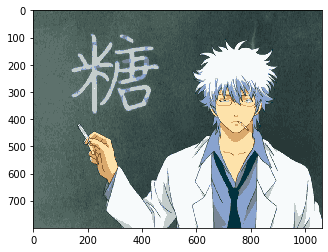

1
2
3
4
5
6
7
8
9


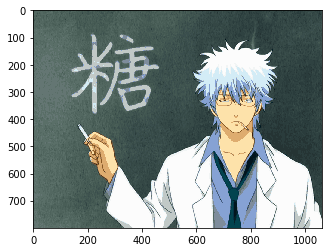

1
2
3
4
5
6
7
8


In [ ]:
import kmeans
from matplotlib.pyplot import imread
img = imread('sample1.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float32)
# YOUR (SEVERAL LINES) CODE HERE
# begin answer
for k in [8,16,32,64]:
    idx, ctrs, _ = kmeans.kmeans(fea, k)
    r_fea = np.zeros(fea.shape)
    for i in range(len(fea)):
        r_fea[i] = ctrs[idx[i]]
    plt.imshow(r_fea.reshape(img.shape).astype(np.uint8))
    plt.show()
# end answer


